In [ ]:
# Mount the drive for dataset access
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import the required libraries
import numpy as np
import pandas as pd
import os
import cv2
import re
import tensorflow as tf

In [ ]:
import matplotlib.pyplot as plt
import random
from PIL import Image
import skimage

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/train_masks2.csv')
data.head()

,subject,img,pixels
0,24,1,129492 4 129905 18 130324 21 130742 24 131159 ...
1,24,2,96751 6 97169 12 97583 20 98002 21 98420 24 98...
2,24,3,NaN
3,24,4,109741 32 110153 41 110566 50 110984 55 111402...
4,24,5,137915 9 138333 13 138720 50 139133 59 139549 ...


In [ ]:
train_data_path = os.listdir('/content/drive/MyDrive/train_1/')
test_data_path = os.listdir('/content/drive/MyDrive/test/')

print(len(train_data_path), len(test_data_path))

5514 3320


In [ ]:
train_data_path2 = os.listdir('/content/drive/MyDrive/train_2/')
print(len(train_data_path2))

5464


In [ ]:
train_data_path

In [ ]:
reg = re.compile("[0-9]+")

temp1 = list(map(lambda x: reg.match(x).group(), train_data_path))
temp1 = list(map(int, temp1))

temp2 = list(map(lambda x: reg.match(x.split("_")[1]).group(), train_data_path))
temp2 = list(map(int, temp2))

train_path = [x for _,_,x in sorted(zip(temp1, temp2, train_data_path))]
train_path[:20]

['1_1.tif',
 '1_1_mask.tif',
 '1_2.tif',
 '1_2_mask.tif',
 '1_3.tif',
 '1_3_mask.tif',
 '1_4.tif',
 '1_4_mask.tif',
 '1_5.tif',
 '1_5_mask.tif',
 '1_6.tif',
 '1_6_mask.tif',
 '1_7.tif',
 '1_7_mask.tif',
 '1_8.tif',
 '1_8_mask.tif',
 '1_9.tif',
 '1_9_mask.tif',
 '1_10.tif',
 '1_10_mask.tif']

In [ ]:
len(train_path)

5514

In [ ]:
temp3 = list(map(lambda x: reg.match(x).group(), train_data_path2))
temp3 = list(map(int, temp3))

temp4 = list(map(lambda x: reg.match(x.split("_")[1]).group(), train_data_path2))
temp4 = list(map(int, temp4))

train_path2 = [x for _,_,x in sorted(zip(temp3, temp4, train_data_path2))]
train_path2[:20]

['24_1.tif',
 '24_1_mask.tif',
 '24_2.tif',
 '24_2_mask.tif',
 '24_3.tif',
 '24_3_mask.tif',
 '24_4.tif',
 '24_4_mask.tif',
 '24_5.tif',
 '24_5_mask.tif',
 '24_6.tif',
 '24_6_mask.tif',
 '24_7.tif',
 '24_7_mask.tif',
 '24_8.tif',
 '24_8_mask.tif',
 '24_9.tif',
 '24_9_mask.tif',
 '24_10.tif',
 '24_10_mask.tif']

In [ ]:
len(train_path2)

5464

In [ ]:
# Creating lists for original and masked images
train_image = []
train_mask = []

for index , item in enumerate(train_path):
  if index % 2 == 0:
    train_image.append(item)
  else:
    train_mask.append(item)

print(len(train_image), len(train_mask))

2757 2757


In [ ]:
train_image2 = []
train_mask2 = []
for index, item in enumerate(train_path2):
  if index % 2 == 0:
    train_image2.append(item)
  else:
    train_mask2.append(item)
print(len(train_image2), len(train_mask2))

2732 2732


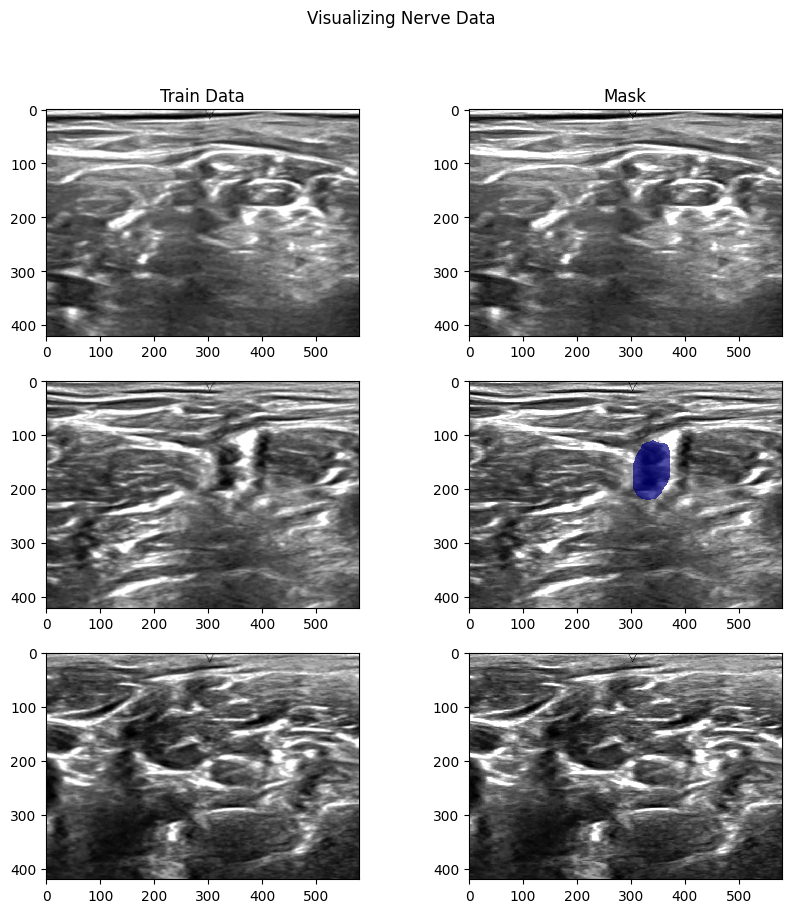

In [ ]:
# Visualizing Nerve Data
fig , ax = plt.subplots(3 , 2 , figsize=[10 , 10])
fig.suptitle('Visualizing Nerve Data')
ax[0 , 0].set_title('Train Data')
ax[0 , 1].set_title('Mask')

for i in range(0 , 3):
  ind = random.randint(0 , len(train_image2))
  img1 = np.array(Image.open("/content/drive/MyDrive/train_2/" + str(train_image2[ind])))
  ax[i , 0].imshow(img1 , cmap = 'gray')

  img2 = np.array(Image.open("/content/drive/MyDrive/train_2/" + str(train_mask2[ind])))
  img2 = np.ma.masked_where(img2 == 0, img2)
  ax[i , 1].imshow(img1 , cmap = 'gray' , interpolation = 'none')
  ax[i , 1].imshow(img2 , cmap = 'jet', interpolation = 'none', alpha = 0.7)

plt.show()

In [ ]:
X = np.zeros((len(train_image2), 128, 128, 1), dtype = np.float32)
y = np.zeros((len(train_image2), 128, 128, 1), dtype = np.float32)

In [ ]:
# conversion of images into numpy arrays
for n , img_name in enumerate(train_image2):
  img = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/train_2/'+img_name , color_mode = "grayscale")
  in_img = tf.keras.preprocessing.image.img_to_array(img)
  in_img = skimage.transform.resize(in_img , (128 , 128 , 1) , mode = 'constant' , preserve_range = True)
  X[n] = in_img / 255.0

for n , img_name in enumerate(train_mask2):
  img = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/train_2/'+img_name , color_mode = "grayscale")
  in_img = tf.keras.preprocessing.image.img_to_array(img)
  in_img = skimage.transform.resize(in_img , (128 , 128 , 1) , mode = 'constant' , preserve_range = True)
  y[n] = in_img / 255.0

In [ ]:
y[:20]

In [ ]:
# splitting of data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [ ]:
def Conv2D_Block(input_tensor , n_filters):
  x = tf.keras.layers.Conv2D(filters = n_filters , kernel_size = (3 , 3) , kernel_initializer = 'he_normal' , padding = 'same')(input_tensor)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Activation('relu')(x)

  x = tf.keras.layers.Conv2D(filters = n_filters , kernel_size = (3 , 3) , kernel_initializer = 'he_normal' , padding = 'same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Activation('relu')(x)

  return x

In [ ]:
def U_Net(img_tensor , n_filters = 16):
  conv1 = Conv2D_Block(img_tensor , n_filters * 1)
  pool1 = tf.keras.layers.MaxPooling2D((2 , 2))(conv1)
  pool1 = tf.keras.layers.Dropout(0.05)(pool1)

  conv2 = Conv2D_Block(pool1 , n_filters * 2)
  pool2 = tf.keras.layers.MaxPooling2D((2 , 2))(conv2)
  pool2 = tf.keras.layers.Dropout(0.05)(pool2)

  conv3 = Conv2D_Block(pool2 , n_filters * 4)
  pool3 = tf.keras.layers.MaxPooling2D((2 , 2))(conv3)
  pool3 = tf.keras.layers.Dropout(0.05)(pool3)

  conv4 = Conv2D_Block(pool3 , n_filters * 8)
  pool4 = tf.keras.layers.MaxPooling2D((2 , 2))(conv4)
  pool4 = tf.keras.layers.Dropout(0.05)(pool4)

  conv5 = Conv2D_Block(pool4 , n_filters * 16)

  pool6 = tf.keras.layers.Conv2DTranspose(n_filters * 8 , (3 , 3) , (2, 2) , padding = 'same')(conv5)
  pool6 = tf.keras.layers.concatenate([pool6 , conv4])
  pool6 = tf.keras.layers.Dropout(0.05)(pool6)
  conv6 = Conv2D_Block(pool6 , n_filters * 8)

  pool7 = tf.keras.layers.Conv2DTranspose(n_filters * 4 , (3 , 3) , (2 , 2) , padding = 'same')(conv6)
  pool7 = tf.keras.layers.concatenate([pool7 , conv3])
  pool7 = tf.keras.layers.Dropout(0.05)(pool7)
  conv7 = Conv2D_Block(pool7 , n_filters * 4)

  pool8 = tf.keras.layers.Conv2DTranspose(n_filters * 2 , (3 , 3) , (2 , 2) , padding = 'same')(conv7)
  pool8 = tf.keras.layers.concatenate([pool8 , conv2])
  pool8 = tf.keras.layers.Dropout(0.05)(pool8)
  conv8 = Conv2D_Block(pool8 , n_filters * 2)

  pool9 = tf.keras.layers.Conv2DTranspose(n_filters * 1 , (3 , 3) , (2 , 2) , padding = 'same')(conv8)
  pool9 = tf.keras.layers.concatenate([pool9 , conv1])
  pool9 = tf.keras.layers.Dropout(0.05)(pool9)
  conv9 = Conv2D_Block(pool9 , n_filters * 1)

  output = tf.keras.layers.Conv2D(1 , (1 , 1) , activation = 'sigmoid')(conv9)

  u_net = tf.keras.Model(inputs = [img_tensor] , outputs = [output])

  return u_net

In [ ]:
# Initial creation of model
img_tensor = tf.keras.layers.Input((128, 128, 1), name = 'img')
model = U_Net(img_tensor)
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
# Loading model for training second set of files
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/unetmodel.h5')

In [ ]:
# Compiling Model for second set of Data
loaded_model.compile(optimizer = tf.keras.optimizers.Adam(),
                     loss = 'binary_crossentropy',
                     metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 img (InputLayer)            [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 conv2d_23 (Conv2D)          (None, 128, 128, 16)         160       ['img[0][0]']                 
                                                                                                  
 batch_normalization_18 (Ba  (None, 128, 128, 16)         64        ['conv2d_23[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_18 (Activation)  (None, 128, 128, 16)         0         ['batch_normalization_18

In [ ]:
# defining callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10, verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1),
    tf.keras.callbacks.ModelCheckpoint('model_nerve2.h5', verbose=1, save_best_only=True, save_weights_only=True)
]


In [ ]:
# training the model
results = loaded_model.fit(X_train, y_train, batch_size = 32, epochs = 50, callbacks = callbacks, \
                    validation_data = (X_test, y_test))

Epoch 1/50
77/77 [==============================] - ETA: 0s - loss: 0.0487 - accuracy: 0.9609
Epoch 1: val_loss improved from inf to 0.03959, saving model to model_nerve2.h5
77/77 [==============================] - 574s 7s/step - loss: 0.0487 - accuracy: 0.9609 - val_loss: 0.0396 - val_accuracy: 0.9604 - lr: 0.0010
Epoch 2/50
77/77 [==============================] - ETA: 0s - loss: 0.0429 - accuracy: 0.9615
Epoch 2: val_loss improved from 0.03959 to 0.03945, saving model to model_nerve2.h5
77/77 [==============================] - 566s 7s/step - loss: 0.0429 - accuracy: 0.9615 - val_loss: 0.0395 - val_accuracy: 0.9607 - lr: 0.0010
Epoch 3/50
77/77 [==============================] - ETA: 0s - loss: 0.0401 - accuracy: 0.9620
Epoch 3: val_loss improved from 0.03945 to 0.03866, saving model to model_nerve2.h5
77/77 [==============================] - 552s 7s/step - loss: 0.0401 - accuracy: 0.9620 - val_loss: 0.0387 - val_accuracy: 0.9599 - lr: 0.0010
Epoch 4/50
77/77 [=======================

In [ ]:
def save_model(model, suffix=None):
    model_dir = os.path.join('/content/drive/MyDrive/')
    model_path = model_dir + '-' + suffix + '.h5'
    print('Saving the model to {}'.format(model_path))
    model.save(model_path)
    return model_path

def load_model(model_path):
    print('Loading the model from path: {}'.format(model_path))
    model = tf.keras.models.load_model(model_path,
                               custom_objects={'KerasLayer' : hub.KerasLayer})
    return model

In [ ]:
loaded_model.save('/content/drive/MyDrive/unetmodel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


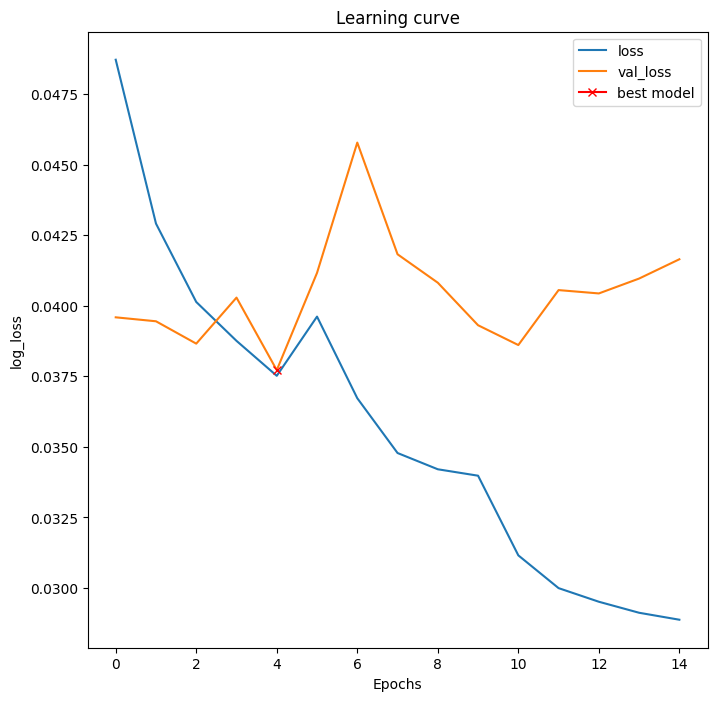

In [ ]:
# plotting the Learning curves
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")
plt.plot( np.argmin(results.history["val_loss"]),
         np.min(results.history["val_loss"]), marker="x",
          color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();

In [ ]:
model.load_weights('model_nerve.h5')

In [ ]:
# accuracy over validation data
loaded_model.evaluate(X_test, y_test, verbose = 1)

9/9 [==============================] - 15s 2s/step - loss: 0.0416 - accuracy: 0.9605


[0.0416482575237751, 0.9605180621147156]

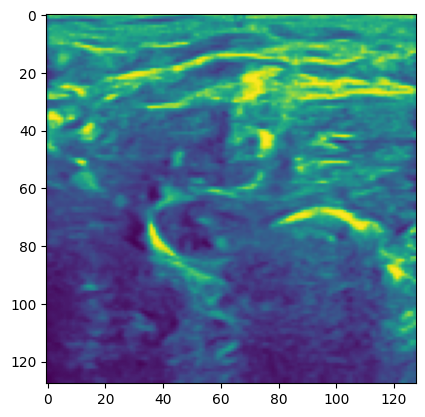

In [ ]:
# prediction on unknown samples from test dataset
img_name = '1000.tif'
img = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/test/'+img_name , color_mode = "grayscale")
in_img = tf.keras.preprocessing.image.img_to_array(img)
in_img = skimage.transform.resize(in_img , (128 , 128 , 1) , mode = 'constant' , preserve_range = True)
test = in_img / 255.0
plt.imshow(test.squeeze())

In [ ]:
test

array([[[0.633724  ],
        [0.81965595],
        [0.755856  ],
        ...,
        [0.76099694],
        [0.76412916],
        [0.65777135]],

       [[0.52124006],
        [0.65510386],
        [0.6487613 ],
        ...,
        [0.783262  ],
        [0.8326894 ],
        [0.70879   ]],

       [[0.26561317],
        [0.3639196 ],
        [0.36361623],
        ...,
        [0.6055658 ],
        [0.62197644],
        [0.5518436 ]],

       ...,

       [[0.01386173],
        [0.02466431],
        [0.03741086],
        ...,
        [0.3296321 ],
        [0.31939763],
        [0.31110844]],

       [[0.01316566],
        [0.02145167],
        [0.03969755],
        ...,
        [0.31052333],
        [0.29460123],
        [0.27564865]],

       [[0.01442091],
        [0.02380941],
        [0.03646272],
        ...,
        [0.27933893],
        [0.28182134],
        [0.31594458]]], dtype=float32)

In [ ]:
prediction = loaded_model.predict(np.expand_dims(test, 0))
prediction

1/1 [==============================] - 0s 323ms/step


array([[[[0.00150509],
         [0.00210566],
         [0.00170218],
         ...,
         [0.00215491],
         [0.00224399],
         [0.00268369]],

        [[0.00170461],
         [0.00187305],
         [0.0008536 ],
         ...,
         [0.0024604 ],
         [0.00247587],
         [0.00353769]],

        [[0.00138185],
         [0.00102548],
         [0.0005036 ],
         ...,
         [0.00171877],
         [0.0020285 ],
         [0.00232179]],

        ...,

        [[0.00356877],
         [0.00222215],
         [0.00121735],
         ...,
         [0.00105855],
         [0.00128847],
         [0.00195219]],

        [[0.00423308],
         [0.0031985 ],
         [0.00150232],
         ...,
         [0.00169993],
         [0.00215273],
         [0.00270391]],

        [[0.00332802],
         [0.00358151],
         [0.00223004],
         ...,
         [0.00213002],
         [0.00249123],
         [0.00333052]]]], dtype=float32)

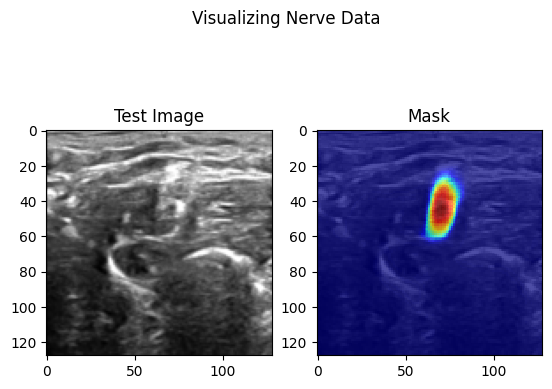

In [ ]:
# visualizing the nerve on test data
fig , ax = plt.subplots(1 , 2)
fig.suptitle('Visualizing Nerve Data')
ax[0].set_title('Test Image')
ax[1].set_title('Mask')
img1 = test.squeeze()
ax[0].imshow(img1 , cmap = 'gray')

img2 = prediction.squeeze()
img2 = np.ma.masked_where(img2 == 0, img2)
ax[1].imshow(img1 , cmap = 'gray' , interpolation = 'none')
ax[1].imshow(img2 , cmap = 'jet', interpolation = 'none', alpha = 0.7)

plt.show()